# Exploratory Data Analysis — Student Performance

## Objective
Understand the structure, quality, and relationships within the `student_habits_performance` dataset in order to support predictive modeling of exam scores.

This notebook focuses on:
- Data understanding
- Data cleaning and preprocessing
- Feature characterization






## Dataset Overview


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown


sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('https://github.com/atlantico-academy/datasets/raw/main/student_habits_performance.csv')

In [ ]:
# @title Initial Info
display(Markdown("### First lines"))
display(df.head())

display(Markdown("### Last lines"))
display(df.tail())

display(Markdown("### Variable shape"))
df.info()

display(Markdown("### # of unique values"))
df.nunique()


### First lines

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

### Last lines

student_id  age  gender  study_hours_per_day  social_media_hours  \
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
995            1.6            No                   77.0          7.5   
996            2.4           Yes                   86.0          6.8   
997            1.3            No                   61.9          6.5   
998            1.1           Yes                  100.0          7.6   
999            1.9            No                   89.4          7.1   

    diet_quality  exercise_frequency parental_education_level  \
995         Fair                   2              High School   
996         Poor                   1              High School   
997         Good                   5                 Bachelor   
998         Fair                   0                 Bachelor   
999         Good                   2                 Bachelor   

    internet_quality  mental_health_rating extracurricular_participation  \
995             Good                     6                           Yes   
996          Average                     6                           Yes   
997             Good                     9                           Yes   
998          Average                     1                            No   
999          Average                     8                            No   

     exam_score  
995        76.1  
996        65.9  
997        64.4  
998        69.7  
999        74.9

### Variable shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

### # of unique values

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

# Dataset description

## Data dictionary (PTBR)

In [ ]:
df_dict = pd.DataFrame([
    {
        "variavel": "student_id",
        "descricao": "identificação do estudante",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "age",
        "descricao": "idade do aluno",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "gender",
        "descricao": "Gênero do aluno (Male/Female/Other).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "study_hours_per_day",
        "descricao": "Indica quantas horas estuda/dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "social_media_hours",
        "descricao": "Indica quantas horas utiliza a rede social.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "netflix_hours",
        "descricao": "Indica quantas horas utiliza a Netflix.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "part_time_job",
        "descricao": "trabalha meio período (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "attendance_percentage",
        "descricao": "Porcentagem de presença nas aulas.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sleep_hours",
        "descricao": "Horas de sono por dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "diet_quality",
        "descricao": "Qualidade da dieta (Poor, Fair, Good, Excellent).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "exercise_frequency",
        "descricao": "Frequência de exercício por semana.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "parental_education_level",
        "descricao": "Nível de escolaridade dos pais (High School, Bachelor, Master, PhD).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "internet_quality",
        "descricao": "Qualidade da internet (Poor, Average, Good).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "mental_health_rating",
        "descricao": "Avaliação da saúde mental em uma escala de 1 a 10.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "extracurricular_participation",
        "descricao": "Participação em atividades extracurriculares (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "exam_score",
        "descricao": "Nota no exame.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    }
])
df_dict

variavel  \
0                      student_id   
1                             age   
2                          gender   
3             study_hours_per_day   
4              social_media_hours   
5                   netflix_hours   
6                   part_time_job   
7           attendance_percentage   
8                     sleep_hours   
9                    diet_quality   
10             exercise_frequency   
11       parental_education_level   
12               internet_quality   
13           mental_health_rating   
14  extracurricular_participation   
15                     exam_score   

                                            descricao          tipo   subtipo  
0                          identificação do estudante   qualitativa   nominal  
1                                      idade do aluno  quantitativa  discreta  
2                Gênero do aluno (Male/Female/Other).   qualitativa   nominal  
3                    Indica quantas horas estuda/dia.  quantitativa  contínua  
4         Indica quantas horas utiliza a rede social.  quantitativa  contínua  
5             Indica quantas horas utiliza a Netflix.  quantitativa  contínua  
6                     trabalha meio período (Yes/No).   qualitativa   nominal  
7                  Porcentagem de presença nas aulas.  quantitativa  contínua  
8                              Horas de sono por dia.  quantitativa  contínua  
9   Qualidade da dieta (Poor, Fair, Good, Excellent).   qualitativa   ordinal  
10                Frequência de exercício por semana.  quantitativa  discreta  
11  Nível de escolaridade dos pais (High School, B...   qualitativa   ordinal  
12       Qualidade da internet (Poor, Average, Good).   qualitativa   ordinal  
13  Avaliação da saúde mental em uma escala de 1 a...  quantitativa  discreta  
14  Participação em atividades extracurriculares (...   qualitativa   nominal  
15                                     Nota no exame.  quantitativa  contínua

---
Based on the initial information, we can say that:
 - The dataset has 1000 sample units with 16 variables
 - Classification of variables:
    - Qualitative Nominal:
      * `student_id` ; `gender` ; `part_time_job`; `extracurricular_participation`
    - Qualitative Ordinal:
      * `diet_quality` ; `internet_quality`; `parental_education_level`
    - Quantitative Discrete:
      * `age` ; `exercise_frequency`; `mental_health_rating`
    - Quantitative Continuous:
      * `study_hours_per_day`; `social_media_hours`; `netflix_hours`; `attendance_percentage`; `sleep_hours`; `exam_score`
---

## Univariate Analysis

In [ ]:
# @title Statistical Summary
from IPython.display import Markdown
import pandas as pd

df = pd.read_csv('https://github.com/atlantico-academy/datasets/raw/main/student_habits_performance.csv')

display(Markdown("### Qualitative variables"))
print(df.describe(include='object'))

display(Markdown("### Quantitative variables"))
print(df.describe())

### Qualitative variables

       student_id  gender part_time_job diet_quality parental_education_level  \
count        1000    1000          1000         1000                      909   
unique       1000       3             2            3                        3   
top         S1999  Female            No         Fair              High School   
freq            1     481           785          437                      392   

       internet_quality extracurricular_participation  
count              1000                          1000  
unique                3                             2  
top                Good                            No  
freq                447                           682  


### Quantitative variables

             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

---
The majority of students are female and do not work part-time. They have a reasonable diet and good-quality internet access. The average age of the students is 20.5 years. On average, they dedicate 3.55 hours per day to studying and 4.3 hours to social media and Netflix.

---

## Variable distribution

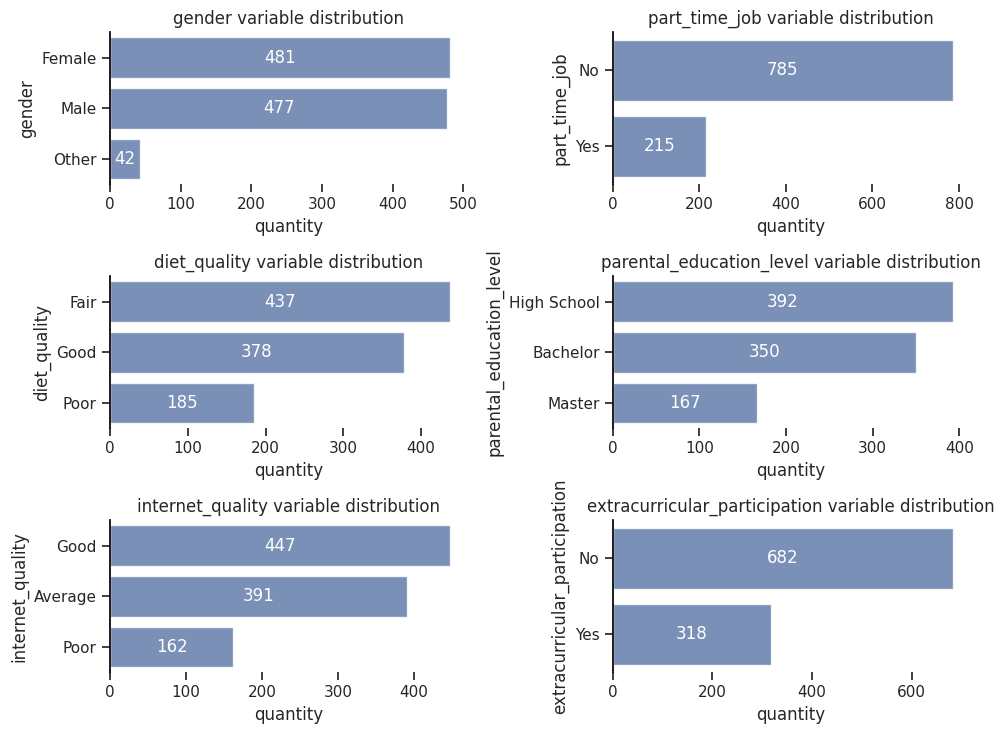

In [ ]:
# @title Qualitative variables
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa' and variavel != 'student_id'").variavel.to_list()


n_vars = len(variaveis_qualitativas)

ncols = 2

nrows = (n_vars + ncols - 1) // ncols

fig, axes = plt.subplots(figsize=(10, nrows * 2.5), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index

    ax = sns.countplot(df, y=variavel, ax=axes[i], order=order, alpha=.8)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"{variavel} variable distribution", xlabel="quantity")

    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

- There are 481 female students and 477 male students. A smaller group of 42 students identify as other.  
- The majority of students do not work part-time (785 vs. 215).  
- The most common diet quality category is "Reasonable" with 437 students, followed closely by "Good" with 378. The "Poor" category is the least frequent, with 185 students.  
- The most frequent parental education level is "High School" (392), followed by "Undergraduate" (350). Higher levels such as "Master’s" (167) are less common.  
- Regarding internet quality: the "Good" category leads with 447 students, followed by "Average" with 391. Only 162 students report having "Poor" internet.  
- Most students do not participate in extracurricular activities (682 vs. 318).  

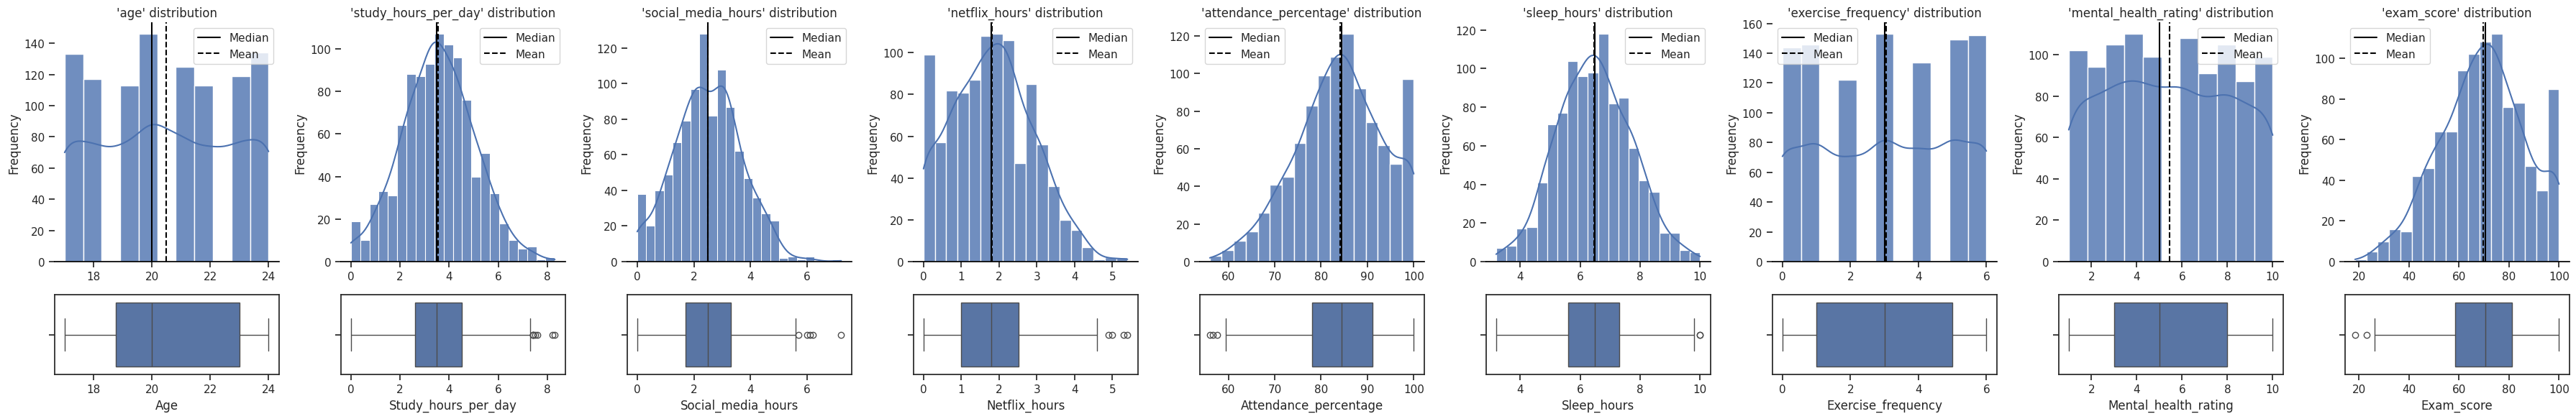

In [ ]:
# @title Quantitative variables
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

# 1. Contar o número de variáveis quantitativas
n_vars = len(variaveis_quantitativas)

# 2. Criar a figura com o número de colunas igual ao número de variáveis
#    Também ajustamos o tamanho da figura dinamicamente para ficar bem dimensionada
fig, axes = plt.subplots(
    figsize=(n_vars * 4, 6),  # Largura dinâmica, altura fixa
    ncols=n_vars,
    nrows=2,
    gridspec_kw={"height_ratios": [3, 1]} # Mantém a proporção entre histograma e boxplot
)


for i, variavel in enumerate(variaveis_quantitativas):
    # Se houver apenas uma variável, 'axes' não será 2D
    if n_vars == 1:
        ax_hist = axes[0]
        ax_box = axes[1]
    else:
        ax_hist = axes[0, i]
        ax_box = axes[1, i]

    # Plotando o Histograma
    sns.histplot(data=df, x=variavel, ax=ax_hist, kde=True, alpha=.8)
    ax_hist.axvline(df[variavel].median(), color="black", label="Median")
    ax_hist.axvline(df[variavel].mean(), color="black", linestyle="--", label="Mean")
    ax_hist.set(title=f"'{variavel}' distribution", ylabel="Frequency", xlabel=None)
    ax_hist.legend()
    ax_hist.spines["bottom"].set_color("black")
    ax_hist.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax_hist.spines[side].set_visible(False)

    # Plotando o Boxplot
    sns.boxplot(data=df, x=variavel, ax=ax_box)
    ax_box.set(xlabel=variavel.capitalize()) # Adiciona um rótulo ao eixo x do boxplot


plt.tight_layout()
plt.show()

## Missing Data

In [ ]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

---
There are 91 missing data regarding parents education

---

## Análise bivariada

Relação entre variáveis quantitativas

Comportamento par a par

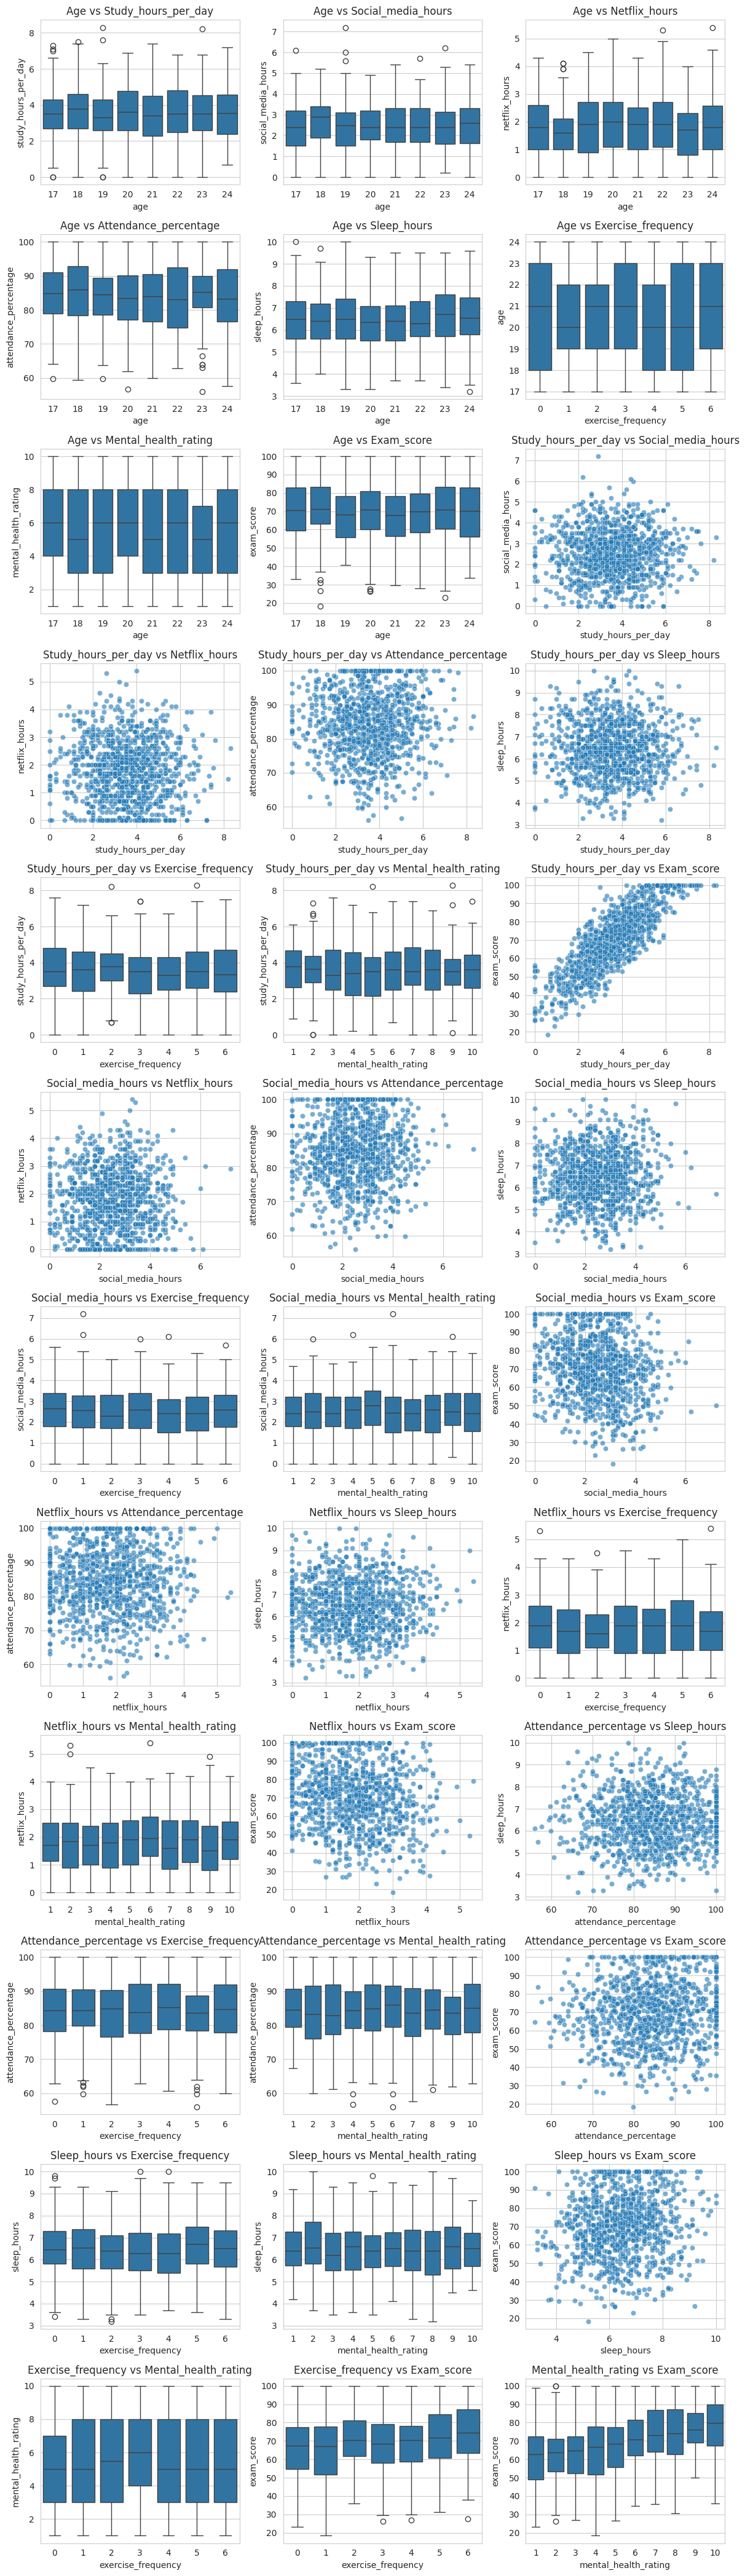

In [ ]:
import itertools

variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()
combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
n_comb = len(combinacoes)

ncols = 3
nrows = (n_comb + ncols - 1) // ncols


fig, axes = plt.subplots(
    figsize=(12, nrows * 3.5),
    ncols=ncols,
    nrows=nrows,
    squeeze=False
)
axes = axes.flatten()


for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()


    if len(set(subtipos)) == 1 and subtipos[0] == 'contínua':
        ax = sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i], alpha=0.6)
    else:

        if df[var_1].nunique() < df[var_2].nunique():
            var_x, var_y = var_1, var_2
        else:
            var_x, var_y = var_2, var_1
        ax = sns.boxplot(data=df, y=var_y, x=var_x, ax=axes[i])

    ax.set(title=f"{var_1.capitalize()} vs {var_2.capitalize()}")


for i in range(n_comb, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Correlação

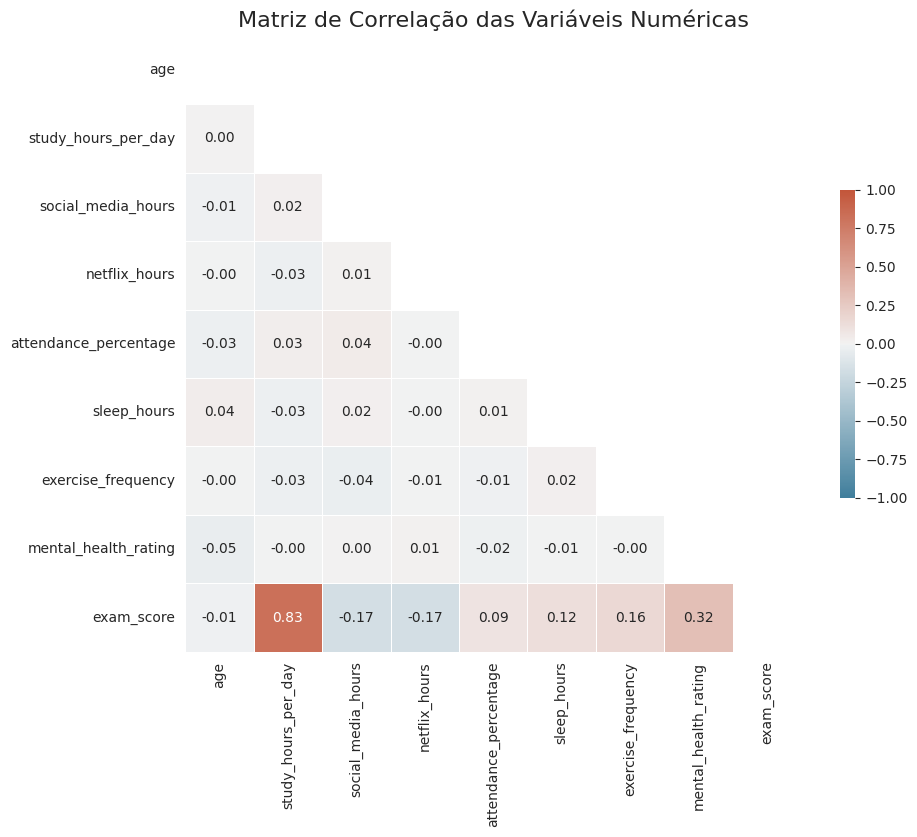

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# @title Correlação

corr = df.corr(numeric_only=True)


mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")


f, ax = plt.subplots(figsize=(10, 8))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


chart = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1, vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    ax=ax,
    annot=True,
    fmt=".2f"
)

plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()


### Relação entre variáveis qualitativas

Contingência

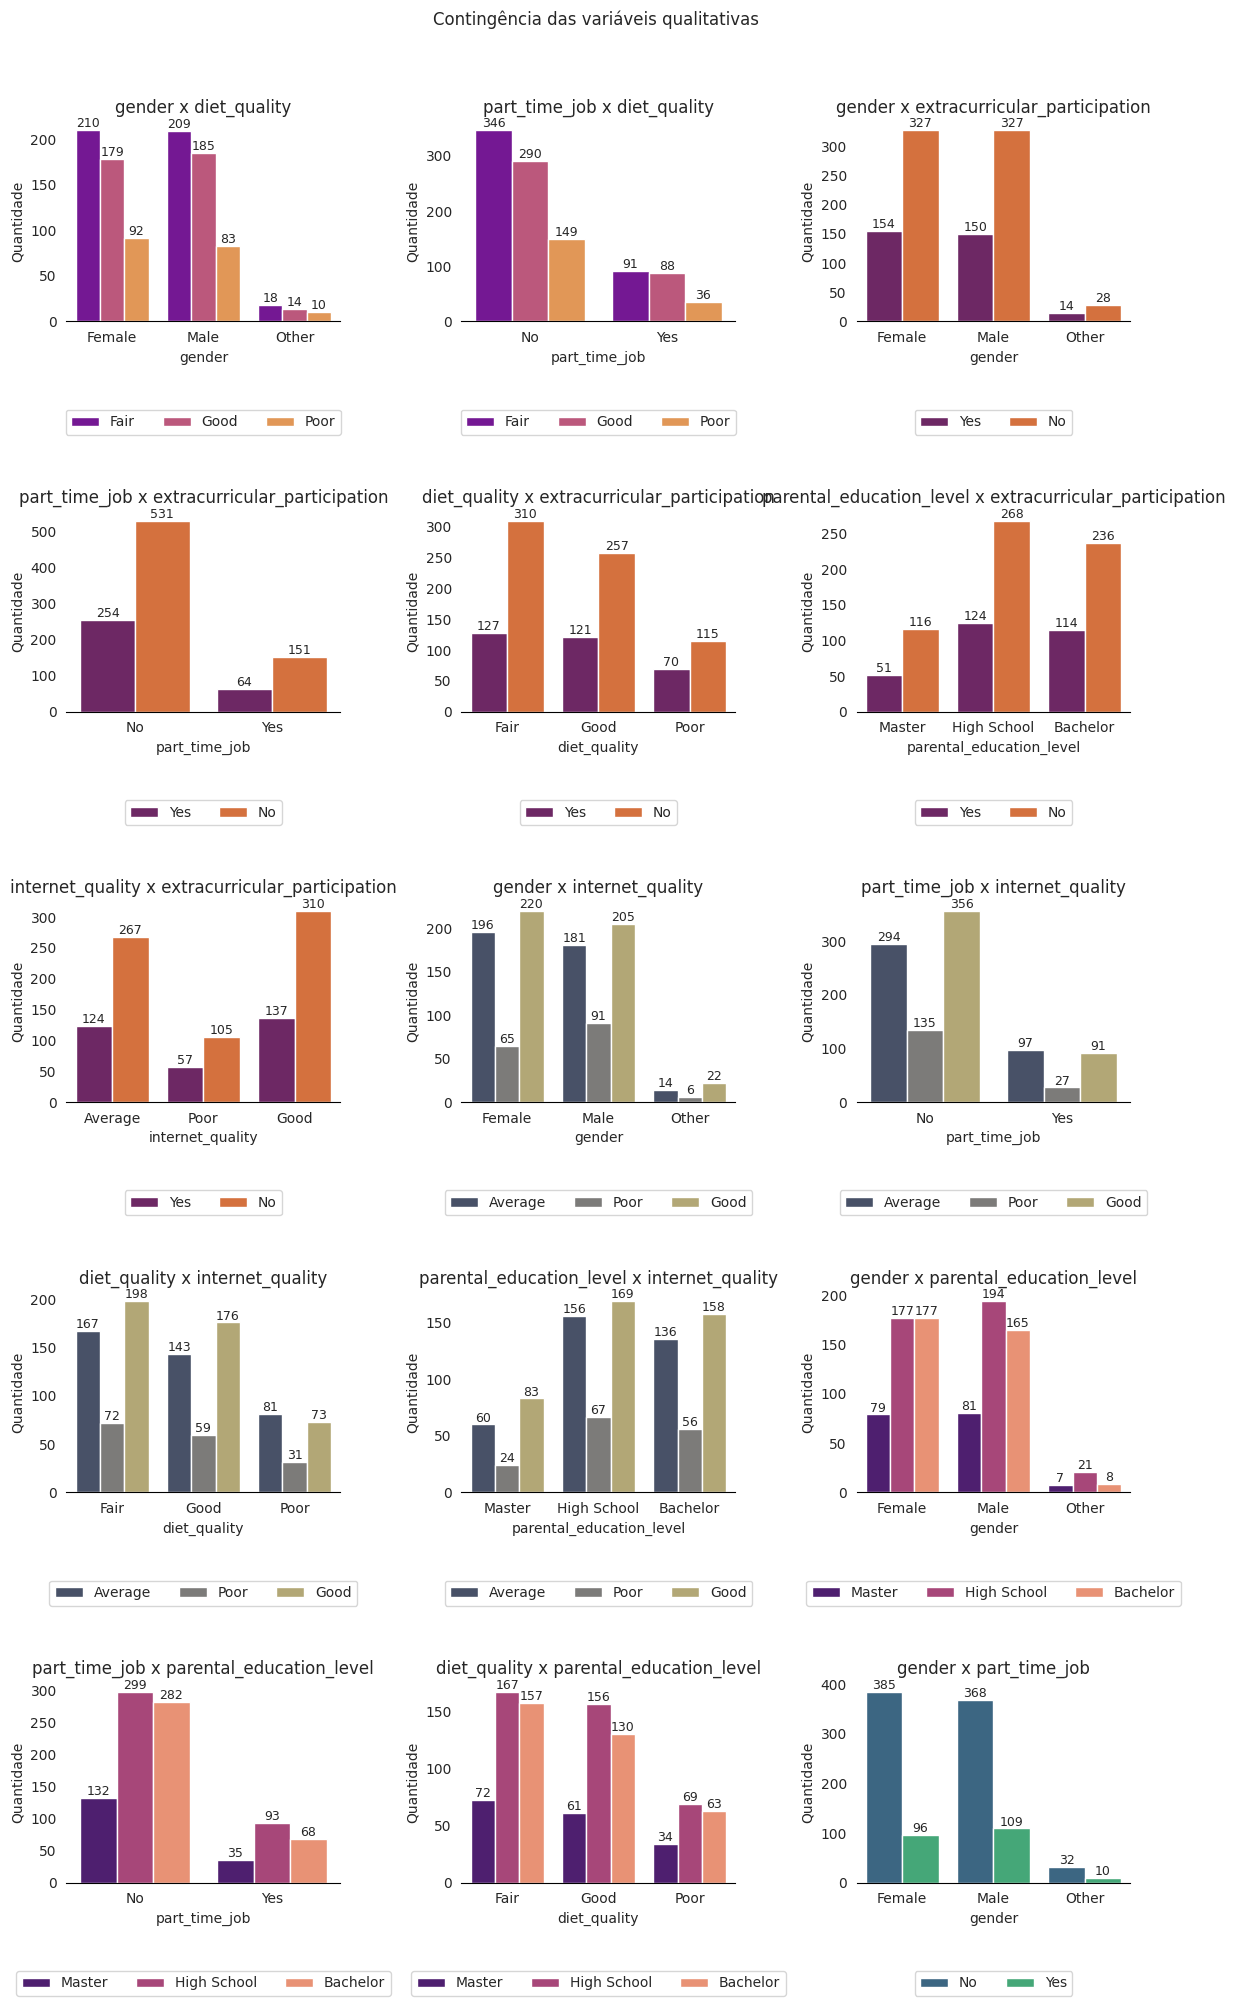

In [ ]:
import itertools

palette_dict = {
    'gender': 'Set2',
    'part_time_job': 'viridis',
    'diet_quality': 'plasma',
    'parental_education_level': 'magma',
    'internet_quality': 'cividis',
    'extracurricular_participation': 'inferno',
    'day': 'crest',
    'time': 'flare'
}


combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)
n_comb = len(combinacoes)
ncols = 3
nrows = (n_comb + ncols - 1) // ncols


fig, axes = plt.subplots(figsize=(12, nrows * 4), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()


for i, (var_1, var_2) in enumerate(combinacoes):
    order = None
    hue_order = None
    if var_2 == 'day':
        hue_order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif var_2 == 'time':
        hue_order = ['Lunch', 'Dinner']
    if var_1 == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']


    ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order, palette=palette_dict.get(var_2))

    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=9)
    ax.set(title=f"{var_1} x {var_2}", ylabel="Quantidade")

    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")

    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )

for j in range(n_comb, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Contingência das variáveis qualitativas", y=1.02)
plt.tight_layout()
plt.show()

### Relação entre variáveis quantitativas e qualitativas

Distribuição relativa

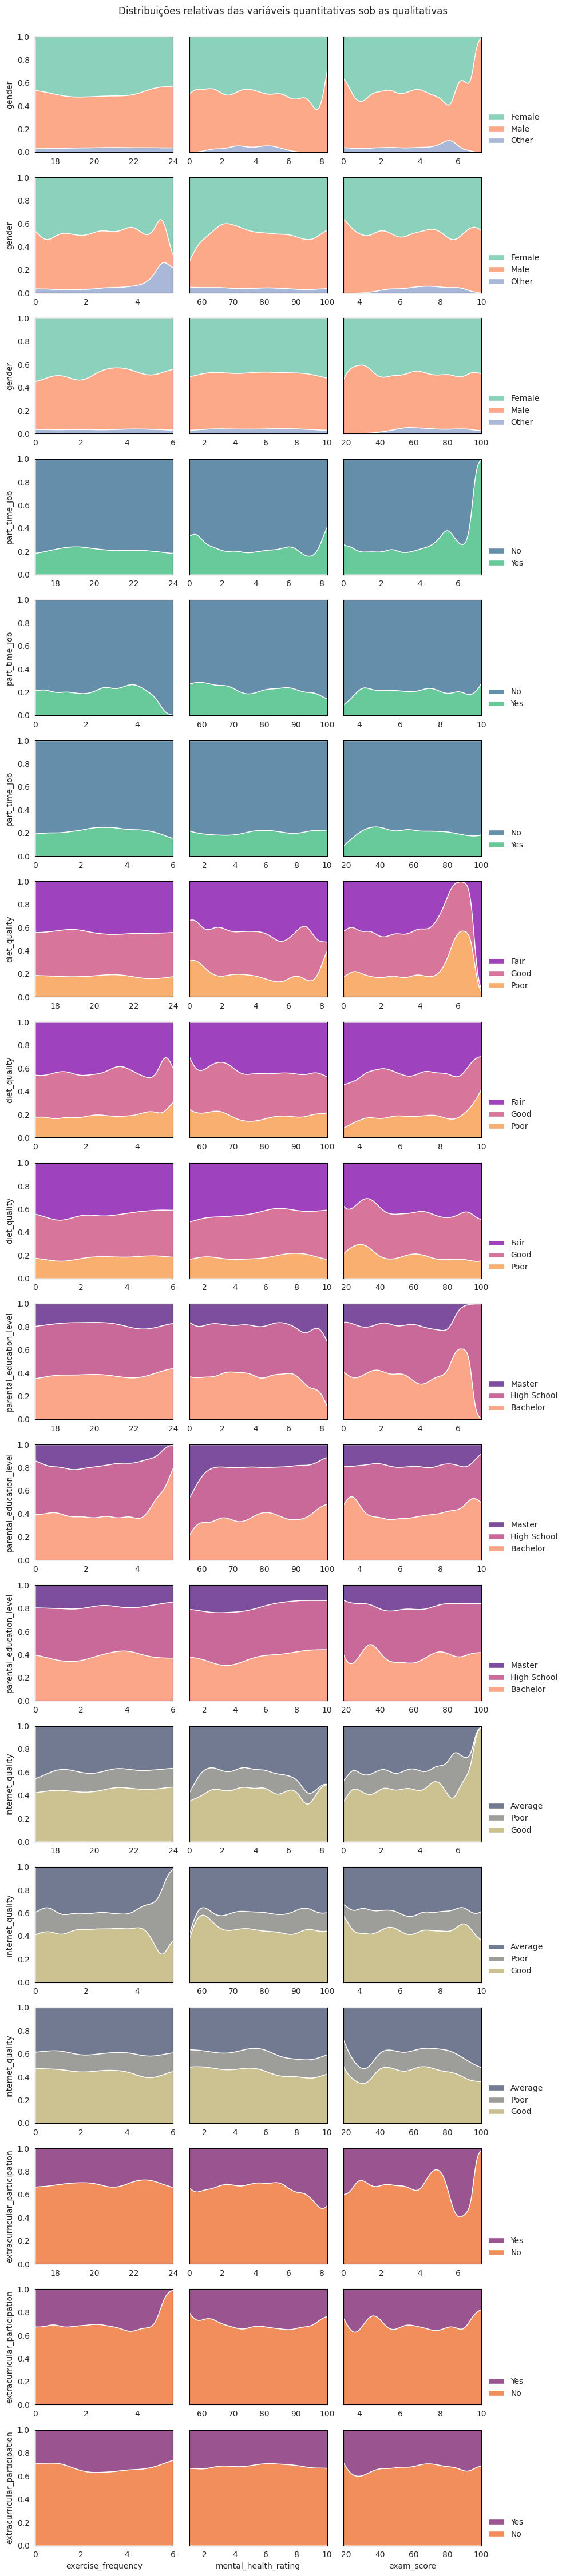

In [ ]:
# @title Distribuição relativa
def kde_plot(df, x, y, axe, i, total_plots, ncols):
    order = None
    palette = palette_dict.get(x)
    if x == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif x == 'time':
        order = ['Lunch', 'Dinner']

    # Lógica para mostrar a legenda apenas na última coluna
    legend = True if ((i + 1) % ncols == 0) else False

    ax = sns.kdeplot(
        data=df, x=y, hue=x, hue_order=order, cut=0,
        multiple="fill", palette=palette, ax=axe, legend=legend
    )

    # Lógica para mostrar o rótulo do eixo X apenas na última linha
    if i >= (total_plots - ncols):
        ax.set_xlabel(y)
    else:
        ax.set_xlabel("")

    ax.set_ylabel(x)

    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")

    if legend:
        sns.move_legend(
            axe, "lower left", ncol=1, title=None,
            bbox_to_anchor=(1, 0), frameon=False
        )


combinacoes = list(itertools.product(variaveis_qualitativas, variaveis_quantitativas))
n_plots = len(combinacoes)


ncols = 3
nrows = (n_plots + ncols - 1) // ncols


fig, axes = plt.subplots(
    figsize=(10, nrows * 2.5),
    ncols=ncols,
    nrows=nrows,
    squeeze=False,
    sharey=True
)
axes = axes.flatten()

for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    kde_plot(df, var_qualitativa, var_quantitativa, axes[i], i, n_plots, ncols)

for j in range(n_plots, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuições relativas das variáveis quantitativas sob as qualitativas', y=1.0)
plt.tight_layout()
plt.show()

# Análise multivariada

Distribuição conjunta

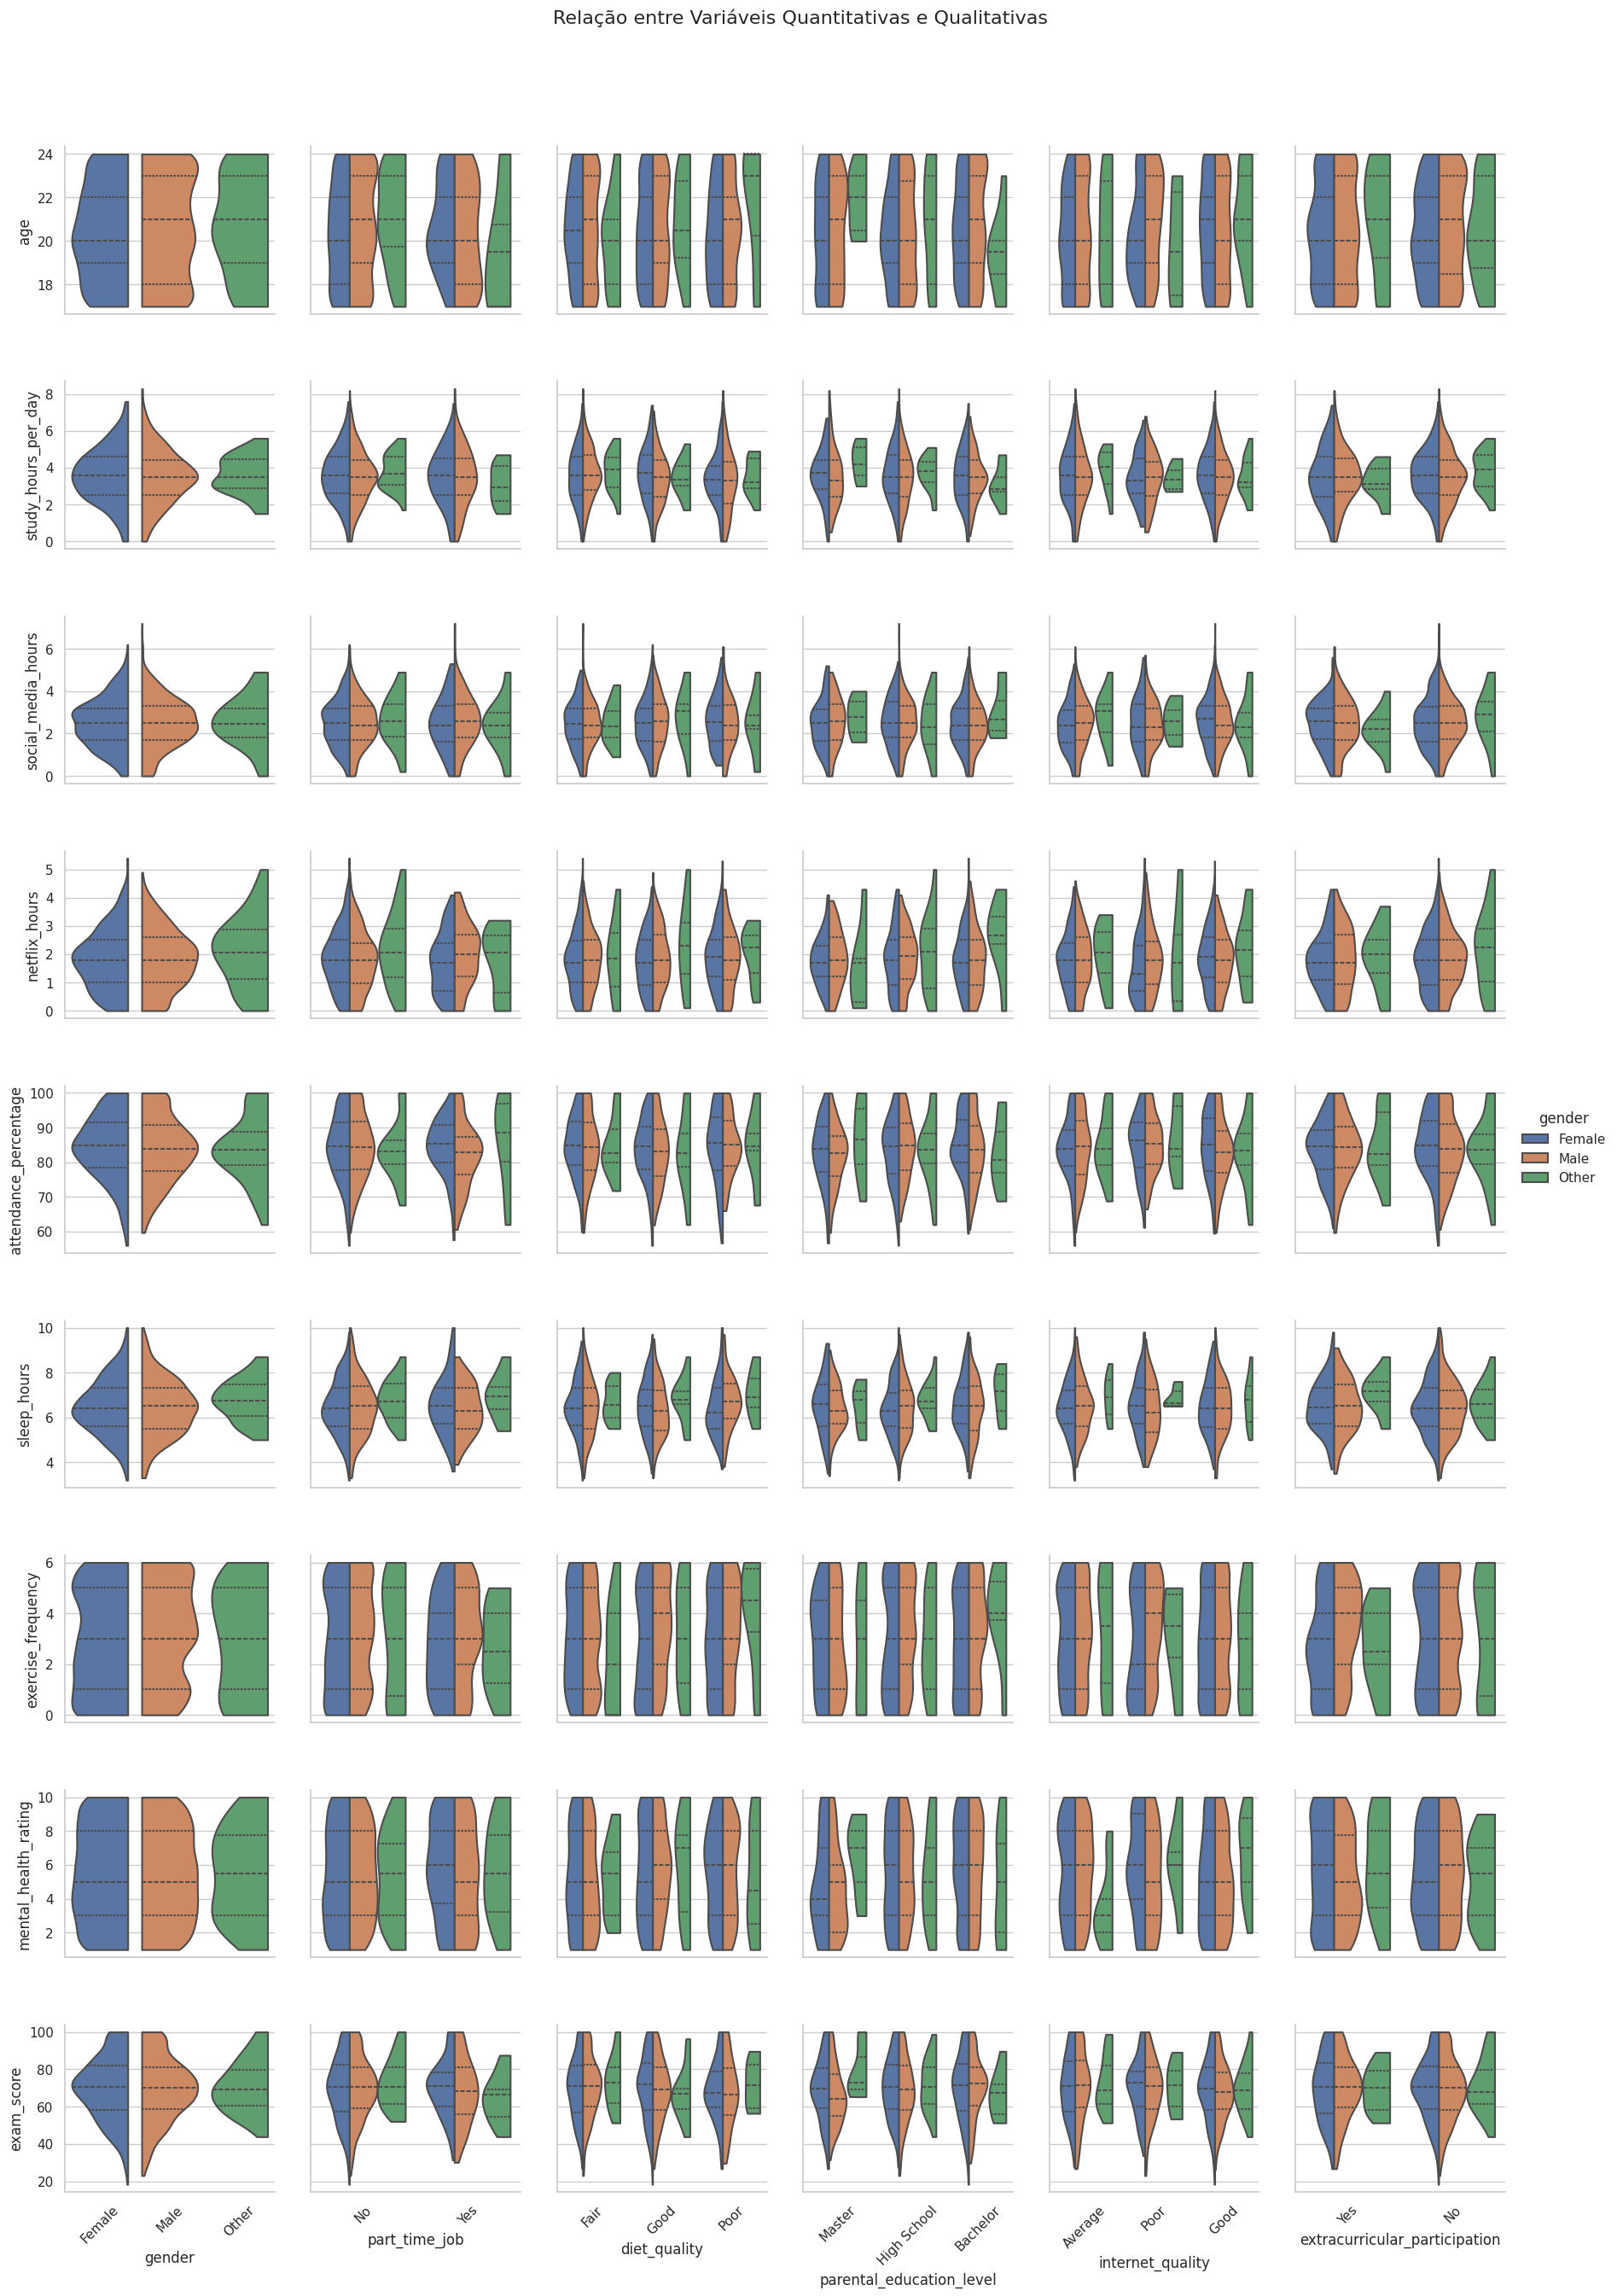

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="deep")

g = sns.PairGrid(
    df, y_vars=variaveis_quantitativas, x_vars=variaveis_qualitativas, hue='gender',
    height=3
)

g.map(sns.violinplot, split=True, inner="quart", cut=0, linewidth=1.5)

g.fig.subplots_adjust(top=0.92, hspace=0.4)

g.fig.suptitle('Relação entre Variáveis Quantitativas e Qualitativas', fontsize=16)

g.tick_params(axis='x', rotation=45)

g.add_legend()

plt.savefig('grafico_melhorado.pdf')
plt.show()

Contingência

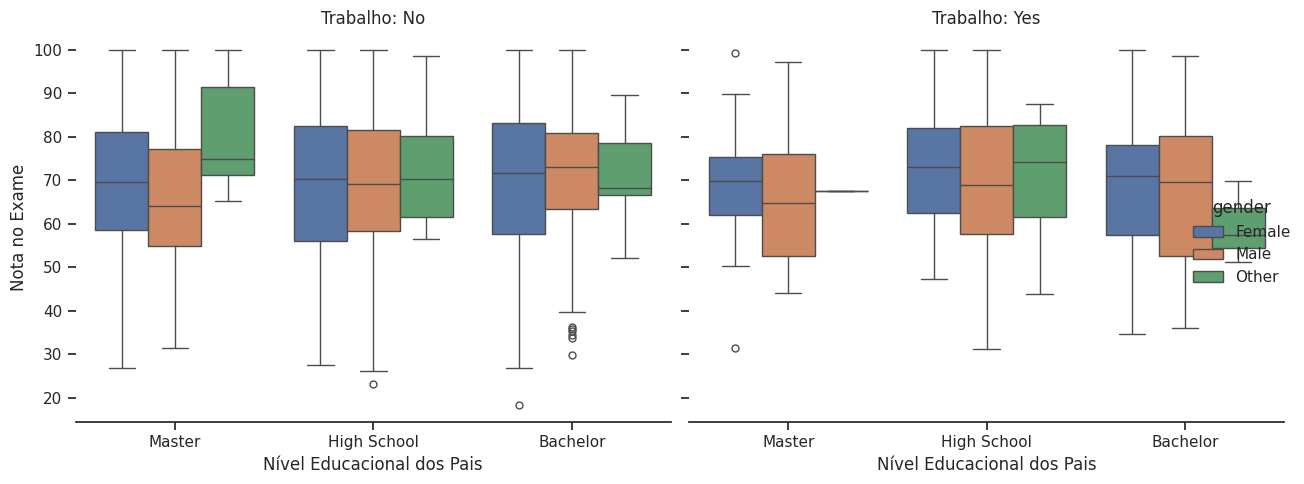

In [ ]:
# @title Contingência


sns.set_theme(style="ticks")

g = sns.catplot(
    data=df,
    x='parental_education_level',
    y='exam_score',
    hue='gender',
    col='part_time_job',  #  cria colunas
    kind='box',           # Tipo de gráfico
    height=5,             # Altura de cada gráfico
    aspect=1.2,           # Proporção largura/altura
    legend_out=True
)

# Ajustes finos
g.set_axis_labels("Nível Educacional dos Pais", "Nota no Exame")
g.set_titles("Trabalho: {col_name}")
g.despine(left=True)
plt.tight_layout()
plt.show()

# Sumário de insights e hipóteses

A grande maioria dos estudantes não possui um trabalho de meio período e não participa de atividades extracurriculares. Isso sugere uma população com alta dedicação aos estudos como atividade principal.

A qualidade da dieta e da internet é, em geral, percebida como "razoável" a "boa" pela maioria. Hábitos como horas de sono, estudo e uso de mídias sociais são fatores variáveis que podem ser determinantes para o desempenho.

A distribuição de gênero na amostra é bastante equilibrada, o que fortalece análises comparativas entre os grupos.

O nível educacional dos pais está concentrado em "Ensino Médio" e "Graduação", indicando um background familiar variado, mas com uma base educacional sólida para uma parcela significativa.